# Data Set

### Description
The purpose is to create a dataset from product images on SSENSE website.

### Abstract:

* 1. Resizing all images to 224px x 224px with the correct aspect ratio.
* 2. Converting all images to gray-scale (Black & White).
* 3. Storing all images in numpy dataset for future use.

### Libraries:
**PIL:** To resize images and to convert them into gray scale.<br>
**NUMPY:** To store converted images into a numpy array.<br>
**Keras:** To convert images into a Keras friendly format.<br>
**Matplotlib:** To plot a sample image from dataset.

In [2]:
import os, sys
from PIL import Image
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from os import walk
from tqdm import tnrange, tqdm_notebook

Using TensorFlow backend.


<hr>

#### Retrieving files

Retrieving the list of images...

In [3]:
mypath = ".\\raw_data\\"
f = []

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    break
print(type(f))

# printing a sample list of retrieved images
print(f[0:10])

# printing the total number of images
print("Total number of files: ", len(f))

<class 'list'>
['161230M164001.jpg', '161230M164003.jpg', '161246F108001.jpg', '161246F109003.jpg', '161246F110006.jpg', '161680F007001.jpg', '161680F009001.jpg', '161680F009002.jpg', '161680F009003.jpg', '161680F011005.jpg']
Total number of files:  18256


<hr>

#### Resizing / Gray Scale

In this cell, we convert all images into gray scale *desired_size x desired_size*.

In [69]:
## resizing and turing into Black & White

#assigning new path to store processed images
new_path = os.path.dirname(mypath) + "\\data\\"

desired_size = 224 #squared 

for index in tqdm_notebook(range(len(f)), desc='File Conversion', leave=True):
    infile = f[index]
    outfile = new_path + os.path.splitext(infile)[0] + ".jpg"
    infile = mypath + "\\" + infile
    try:
        im = Image.open(infile)
        
        # converting into gray-scale
        im = im.convert('L')
        
        # resizing with the original aspect ratio
        #im.thumbnail(desired_size, Image.ANTIALIAS)
        old_size = im.size
                
        ratio = float(desired_size)/max(old_size)
        new_size = tuple([int(x*ratio) for x in old_size])
        im = im.resize(new_size, Image.ANTIALIAS)
        
        # creating a blank white sheet
        new_im = Image.new("RGB", (desired_size,desired_size), (255,255,255))
        
        # pasting the resized image into this sheet.
        new_im.paste(im, ((desired_size-new_size[0])//2,
                    (desired_size-new_size[1])//2))
        new_im.save(outfile, "JPEG")
    except IOError:
        print ("Error: '%s'" % infile)

Error: 'C:\Users\kaveh.bakhtiyari\JupyterProjects\ImageSearch-ACE\raw_data\191216M192005.jpg'


<hr>

#### Generate Dataset

Since all images have been converted in the previous cell, now their raw data (pixel information) would be stored into numpy arrays.

* 1. frames_data: contains the raw pixel information
* 2. frames_ids: contains the product IDs, which matches the index of frames_data.

Once a row of data (a product) is selected from *frames_data*, its products ID can be queried from *frames_ids*.


In [7]:
#Generate dataset
mypath = ".\\data"
dataset_file = os.path.dirname(mypath) + "\\dataset_data.npy"
dataset_ids = os.path.dirname(mypath) + "\\dataset_ids.npy"
f = []

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    break
print("Type: ", type(f))
print("Length: ", len(f))
print("Sample set: ", f[0:10])

# creating the numpy arrays
frames_data = np.empty((len(f), 224, 224, 1))
frames_ids = np.empty(len(f), dtype="U20")

print("Frame shape: ", frames_data.shape)
for index in tqdm_notebook(range(len(f)), desc='Loading images into dataset', leave=True):
    infile = f[index]
    infile = mypath + "\\" + infile
    img = image.load_img(infile, target_size=(224, 224))
    x = image.img_to_array(img)[:,:,0]
    frames_data[index,:,:,0] = x
    frames_ids[index] = os.path.splitext(f[index])[0]

#frames_data = frames_data.reshape(frames_data.shape[0],frames_data.shape[1],frames_data.shape[2], 1)

# saving numpy arrays into files
print("Saving Files, please wait...")
try:
    np.save(dataset_file, frames_data, allow_pickle=True, fix_imports=True)
    np.save(dataset_ids, frames_ids, allow_pickle=True, fix_imports=True)
except:
    print("An error occured")
else:
    print("Files were saved successfully.")

Type:  <class 'list'>
Length:  18256
Sample set:  ['161230M164001.jpg', '161230M164003.jpg', '161246F108001.jpg', '161246F109003.jpg', '161246F110006.jpg', '161680F007001.jpg', '161680F009001.jpg', '161680F009002.jpg', '161680F009003.jpg', '161680F011005.jpg']
Frame shape:  (18256, 224, 224, 1)



Saving Files, please wait...
Files were saved successfully.


<hr>

#### Sample Checking

Once the data is stored, here we check to plot a product from the numpy array to check that it is stored correctly.

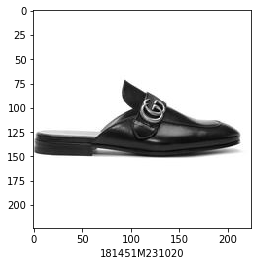

In [9]:
# plotting a sample image from frame
sample_product = 540

# getting data from frames_data
plt.imshow(frames_data[sample_product,:,:,0])

# getting the product id as a label from frames_ids
plt.xlabel(frames_ids[sample_product])
plt.gray()
plt.show()